# Analyse Descriptive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf
from pandas.plotting import lag_plot


In [3]:
Data0 = pd.read_csv(
    "../Data/train.csv",
    parse_dates=["Date"]
)
Data1 = pd.read_csv(
    "../Data/test.csv",
    parse_dates=["Date"]
)

## Basic descriptions


In [7]:
Data0.describe()

,Date,Load,Load.1,Load.7,Net_demand,Solar_power,Wind_power,Temp,Temp_s95,Temp_s99,...,Holiday_zone_a,Holiday_zone_b,Holiday_zone_c,BH_Holiday,Solar_power.1,Solar_power.7,Wind_power.1,Wind_power.7,Net_demand.1,Net_demand.7
count,3471,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,...,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000
mean,2017-12-01 00:00:00,53371.210536,53380.124910,53440.925910,49112.174691,1173.412597,3085.623247,286.152245,286.150128,286.140762,...,0.346010,0.343993,0.348027,3.527514,1172.714594,1168.547705,3085.269141,3083.450501,49120.282856,49164.057896
min,2013-03-02 00:00:00,35502.312500,35502.312500,35502.312500,28134.625000,67.145833,149.375000,269.127132,269.197879,271.244510,...,0.000000,0.000000,0.000000,0.000000,67.145833,67.145833,149.375000,149.375000,28134.625000,28134.625000
25%,2015-07-17 12:00:00,45597.781250,45601.083333,45622.760417,40884.979167,599.145833,1372.916667,281.207514,281.231134,281.204479,...,0.000000,0.000000,0.000000,0.000000,598.968750,597.010417,1371.312500,1367.447917,40902.833333,40943.729167
50%,2017-12-01 00:00:00,49849.875000,49860.854167,49882.166667,46326.895833,1001.770833,2318.791667,285.708961,285.708528,285.727568,...,0.000000,0.000000,0.000000,1.000000,999.854167,996.520833,2318.791667,2314.000000,46329.354167,46374.187500
75%,2020-04-16 12:00:00,61679.937500,61688.968750,61747.583333,56610.281250,1595.760417,4047.531250,291.256586,291.296777,291.364755,...,1.000000,1.000000,1.000000,10.000000,1594.291667,1587.541667,4047.531250,4047.531250,56612.770833,56664.031250
max,2022-09-01 00:00:00,89600.083333,89600.083333,89600.083333,83312.416667,3904.354167,15011.833333,302.454829,302.225500,300.129638,...,1.000000,1.000000,1.000000,11.000000,3904.354167,3904.354167,15011.833333,15011.833333,83312.416667,83312.416667
std,NaN,10659.568587,10665.846197,10705.356939,10697.628159,741.493257,2398.506302,6.148073,6.125621,5.963390,...,0.475765,0.475107,0.476413,4.702784,741.081489,738.459862,2398.715963,2399.304885,10701.619160,10703.437185


In [9]:
print(f"Train data : from {Data0["Date"].min()} to {Data0["Date"].max()}")
print(f"Test data : from {Data1["Date"].min()} to {Data1["Date"].max()}")

Train data : from 2013-03-02 00:00:00 to 2022-09-01 00:00:00
Test data : from 2022-09-02 00:00:00 to 2023-10-01 00:00:00


In [12]:
Data0.columns

Index(['Date', 'Load', 'Load.1', 'Load.7', 'Net_demand', 'Solar_power',
       'Wind_power', 'Temp', 'Temp_s95', 'Temp_s99', 'Temp_s95_min',
       'Temp_s95_max', 'Temp_s99_min', 'Temp_s99_max', 'Wind', 'Wind_weighted',
       'Nebulosity', 'Nebulosity_weighted', 'toy', 'WeekDays', 'BH_before',
       'BH', 'BH_after', 'Year', 'Month', 'DLS', 'Summer_break',
       'Christmas_break', 'Holiday', 'Holiday_zone_a', 'Holiday_zone_b',
       'Holiday_zone_c', 'BH_Holiday', 'Solar_power.1', 'Solar_power.7',
       'Wind_power.1', 'Wind_power.7', 'Net_demand.1', 'Net_demand.7'],
      dtype='object')

In [14]:
Data0[["Date", "WeekDays"]].head()

,Date,WeekDays
0,2013-03-02,5
1,2013-03-03,6
2,2013-03-04,0
3,2013-03-05,1
4,2013-03-06,2


In [18]:
Data0["Date"].dt.day_name().head(7)

0     Saturday
1       Sunday
2       Monday
3      Tuesday
4    Wednesday
5     Thursday
6       Friday
Name: Date, dtype: object

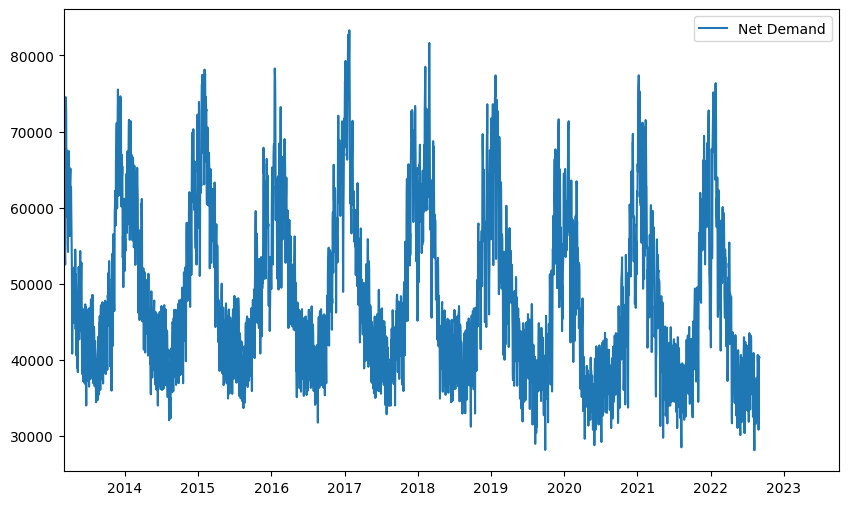

In [ ]:
# trend plots
plt.figure(figsize=(15, 6))
plt.plot(Data0["Date"], Data0["Net_demand"], label="Net Demand")
plt.xlim(Data0["Date"].min(), Data1["Date"].max())
plt.legend()
plt.show()

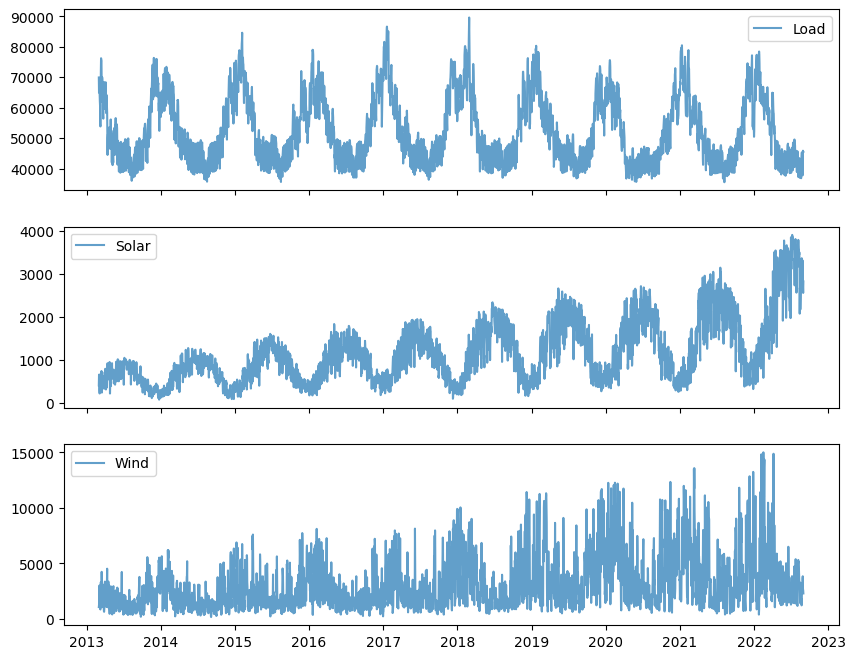

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15, 8))
axes[0].plot(Data0["Date"], Data0["Load"], label="Load", alpha=0.7)
axes[1].plot(Data0["Date"], Data0["Solar_power"], label="Solar", alpha=0.7)
axes[2].plot(Data0["Date"], Data0["Wind_power"], label="Wind", alpha=0.7)
axes[0].legend()
axes[1].legend()
axes[2].legend()
plt.show()

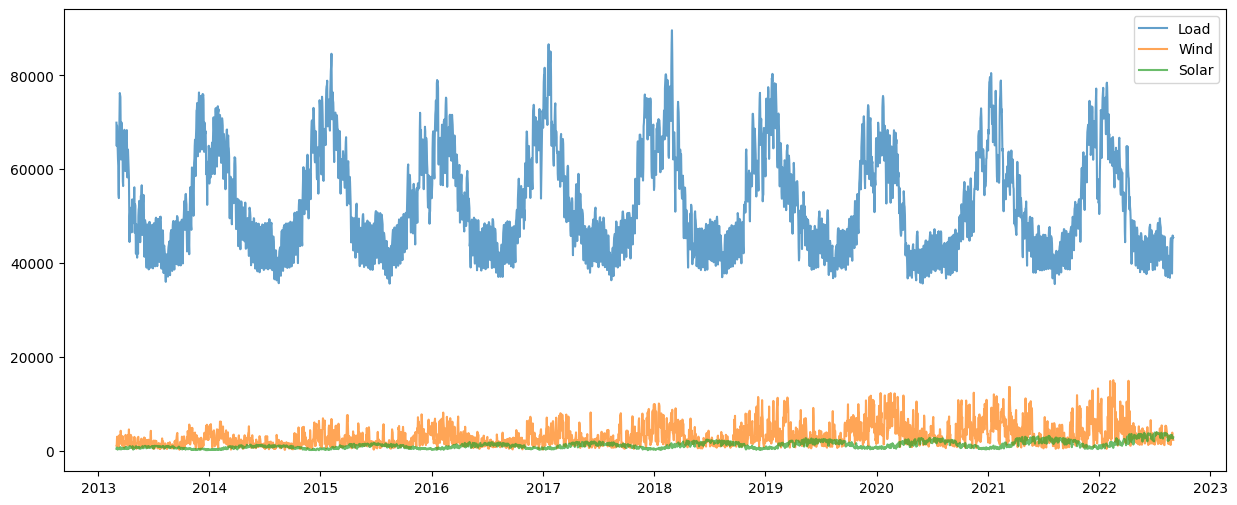

In [57]:
plt.figure(figsize=(15, 6))
plt.plot(Data0["Date"], Data0["Load"], label="Load", alpha=0.7)
plt.plot(Data0["Date"], Data0["Wind_power"], label="Wind", alpha=0.7)
plt.plot(Data0["Date"], Data0["Solar_power"], label="Solar", alpha=0.7)
plt.legend()
plt.show()

In [21]:
# stat summary
print(f"Load mean: {Data0['Load'].mean()}")
print(f"Wind power mean: {Data0['Wind_power'].mean()}")
print(f"Solat power mean: {Data0['Solar_power'].mean()}")

Load mean: 53371.2105361087
Wind power mean: 3085.623247383079
Solat power mean: 1173.4125972342265


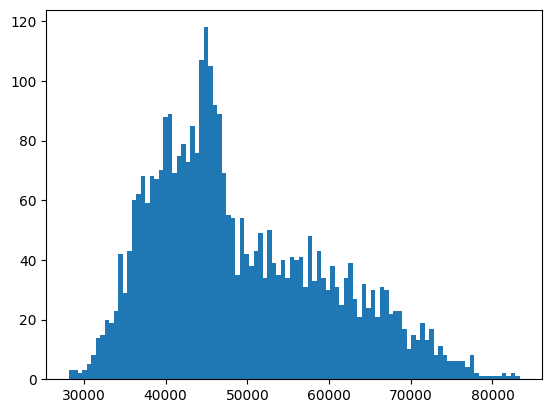

In [53]:
# histogram 
plt.hist(Data0["Net_demand"], bins=100)
plt.show()

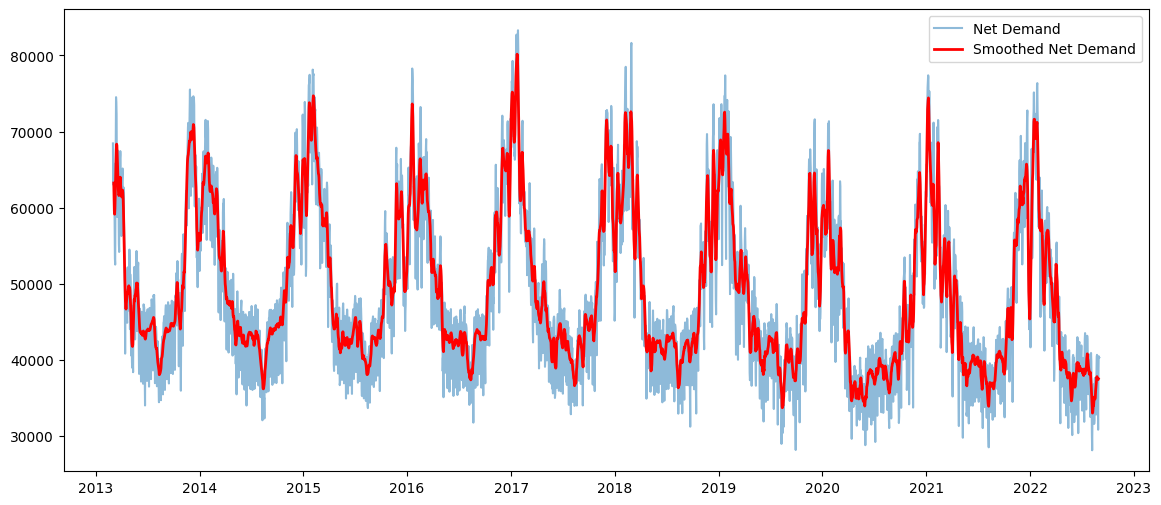

In [ ]:
K = 7
smooth = Data0["Net_demand"].rolling(K, center=True).mean()

plt.figure(figsize=(15, 6))
plt.plot(Data0["Date"], Data0["Net_demand"], label="Net Demand", alpha=0.5)
plt.plot(Data0["Date"], smooth, color="red", linewidth=2, label="Smoothed Net Demand")
plt.legend()
plt.show()

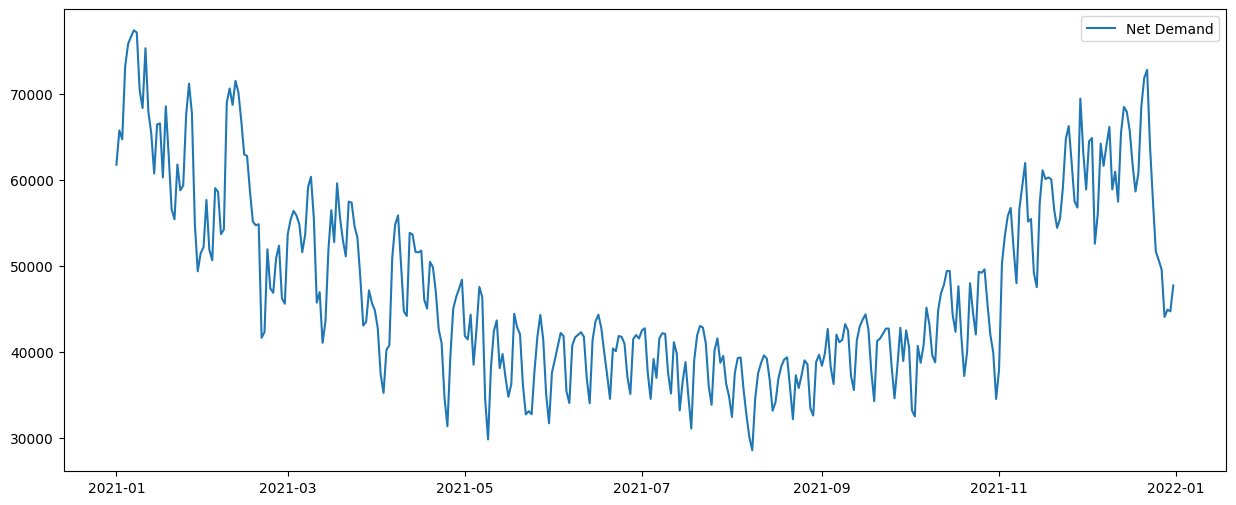

In [58]:
##################### yearly cycle
sel = Data0["Year"] == 2021
plt.figure(figsize=(15, 6))
plt.plot(Data0.loc[sel, "Date"], Data0.loc[sel, "Net_demand"], label="Net Demand")
plt.legend()
plt.show()

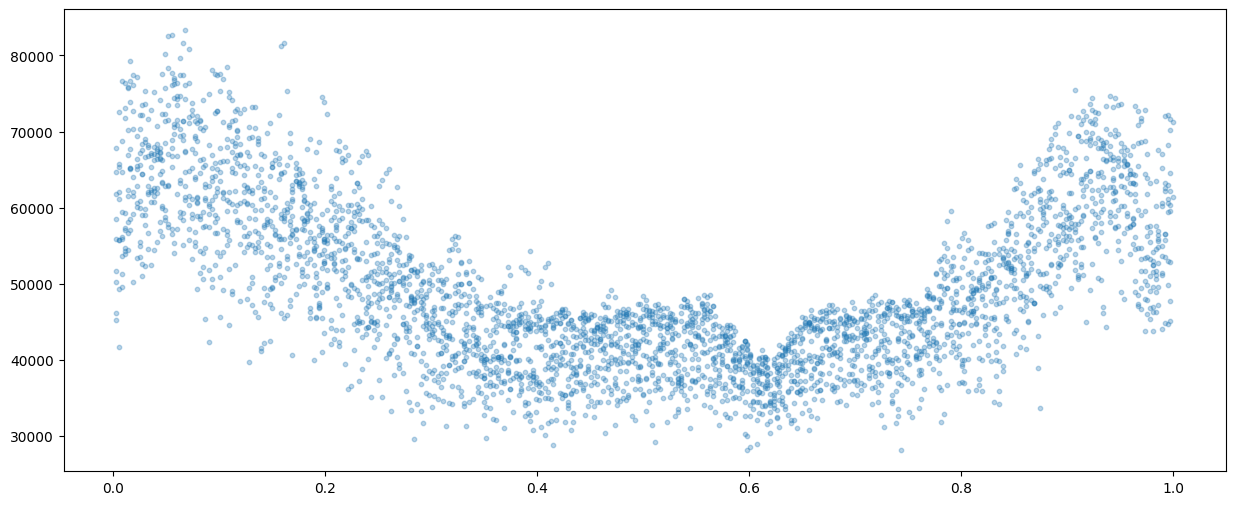

In [60]:
plt.figure(figsize=(15, 6))
plt.scatter(
    Data0["toy"],
    Data0["Net_demand"],
    alpha=0.3,
    s=10
)
plt.show()

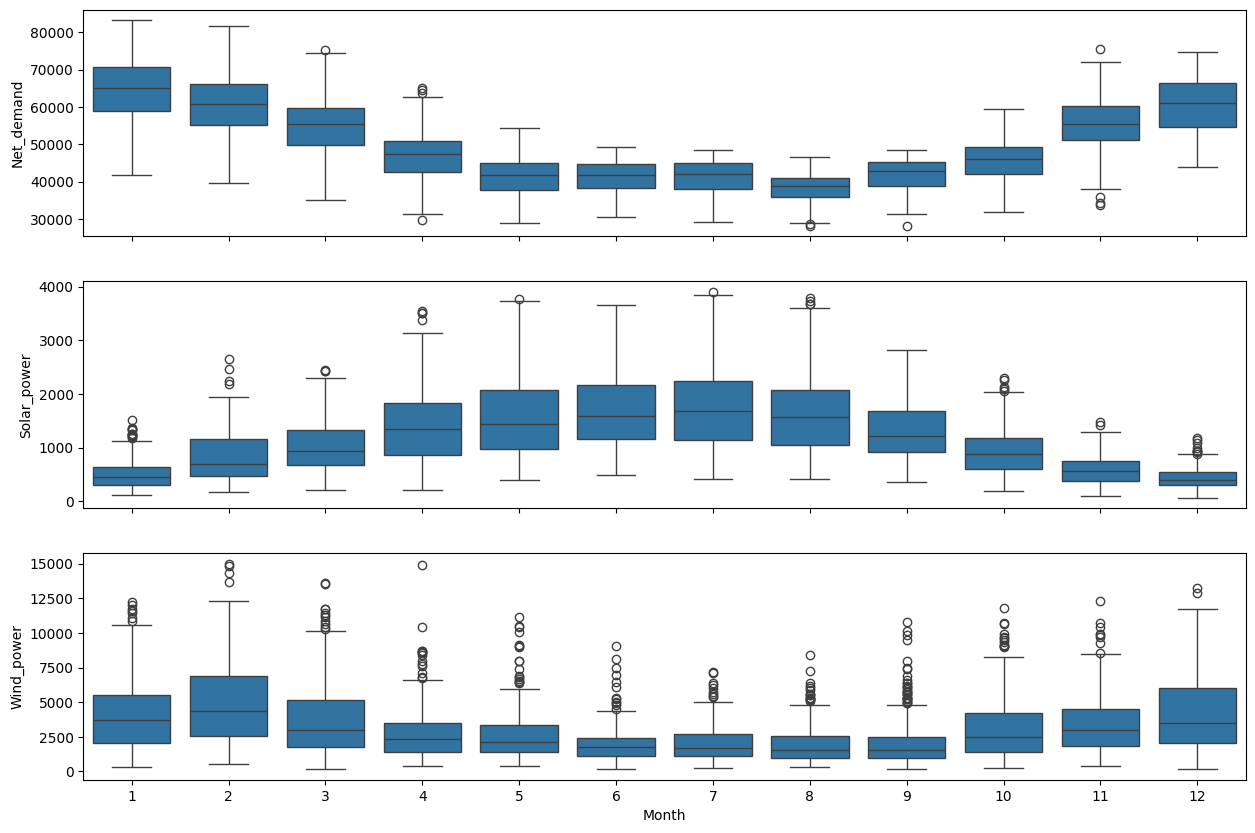

In [61]:
# Monthly boxplots 
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15, 10))

sns.boxplot(x="Month", y="Net_demand", data=Data0, ax=axes[0])
sns.boxplot(x="Month", y="Solar_power", data=Data0, ax=axes[1])
sns.boxplot(x="Month", y="Wind_power", data=Data0, ax=axes[2])

plt.show()

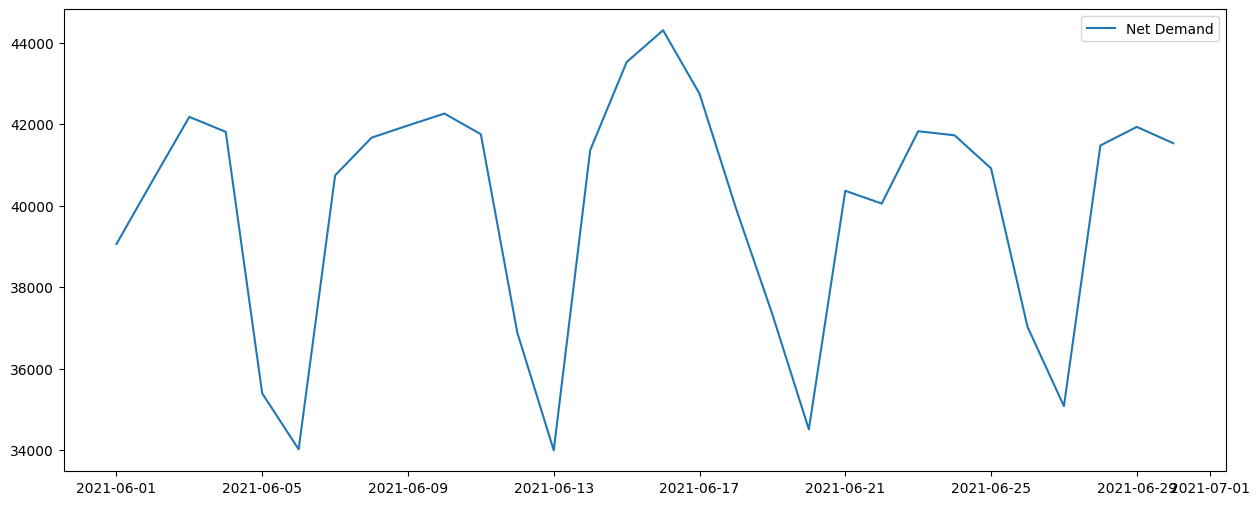

In [63]:
###################### weekly cycle
sel = (Data0["Month"] == 6) & (Data0["Year"] == 2021)
plt.figure(figsize=(15, 6))
plt.plot(Data0.loc[sel, "Date"], Data0.loc[sel, "Net_demand"], label="Net Demand")
plt.legend()
plt.show()


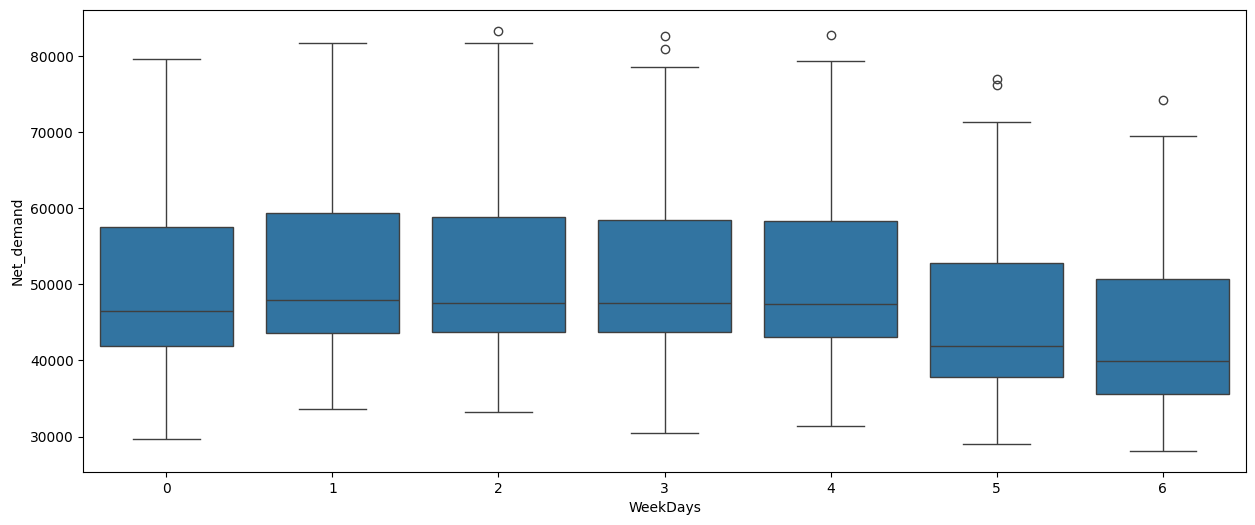

In [64]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="WeekDays", y="Net_demand", data=Data0)
plt.show()

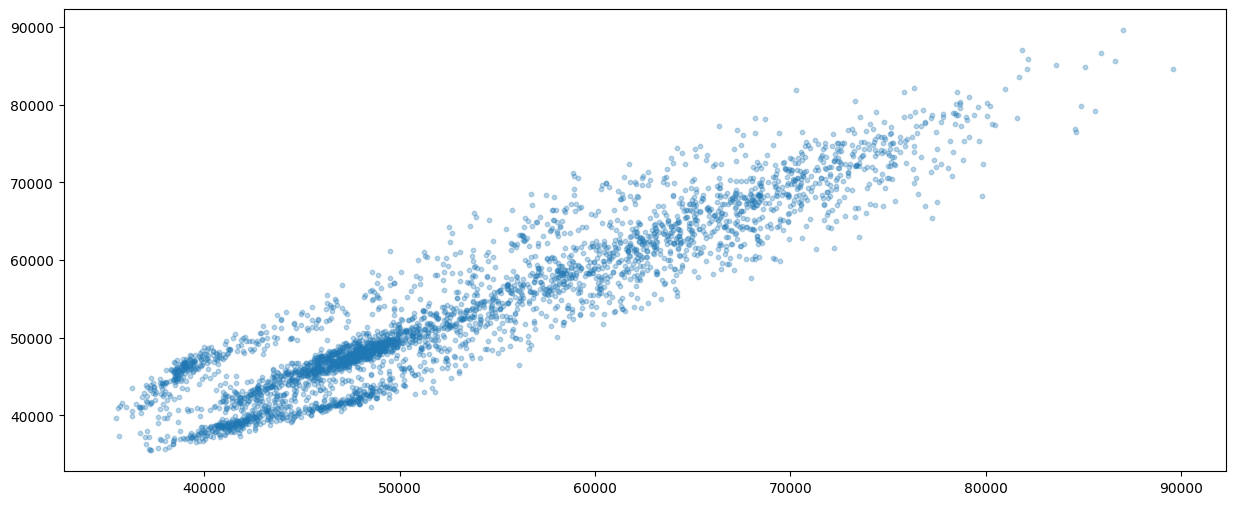

In [65]:
plt.figure(figsize=(15, 6))
plt.scatter(Data0["Load.1"], Data0["Load"], alpha=0.3, s=10)
plt.show()

In [67]:
print(f"The correlation between Load.1 and Load is: {Data0['Load.1'].corr(Data0['Load'])}")

The correlation between Load.1 and Load is: 0.9374911045120465


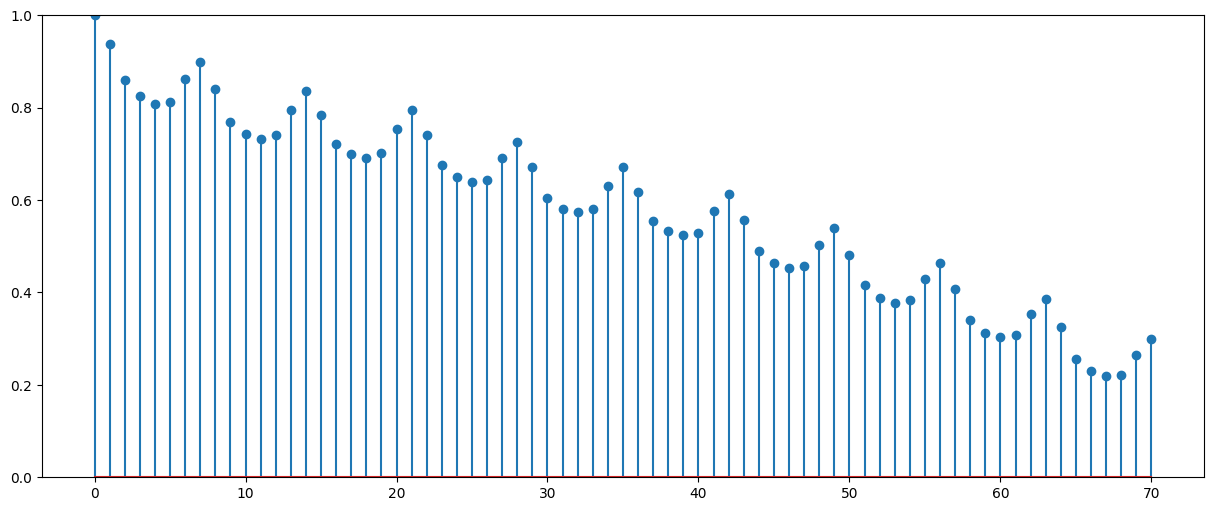

In [74]:
# ACF
lags = 7 * 10
acf_vals = acf(Data0["Load"], nlags=lags, fft=True)

plt.figure(figsize=(15, 6))
plt.stem(range(len(acf_vals)), acf_vals)
plt.ylim(0, 1)
plt.show()

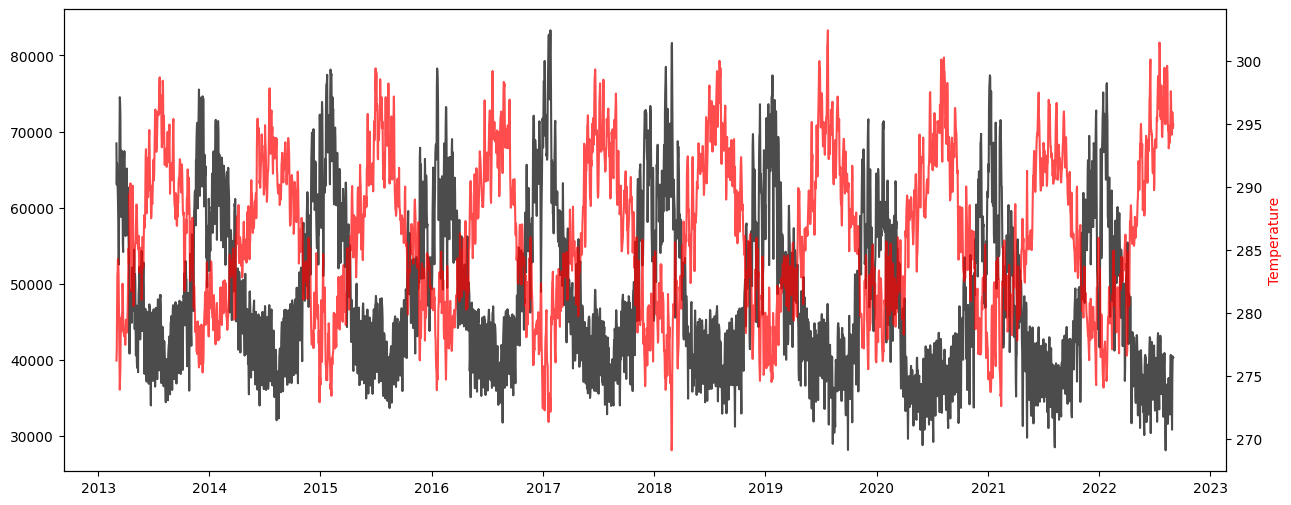

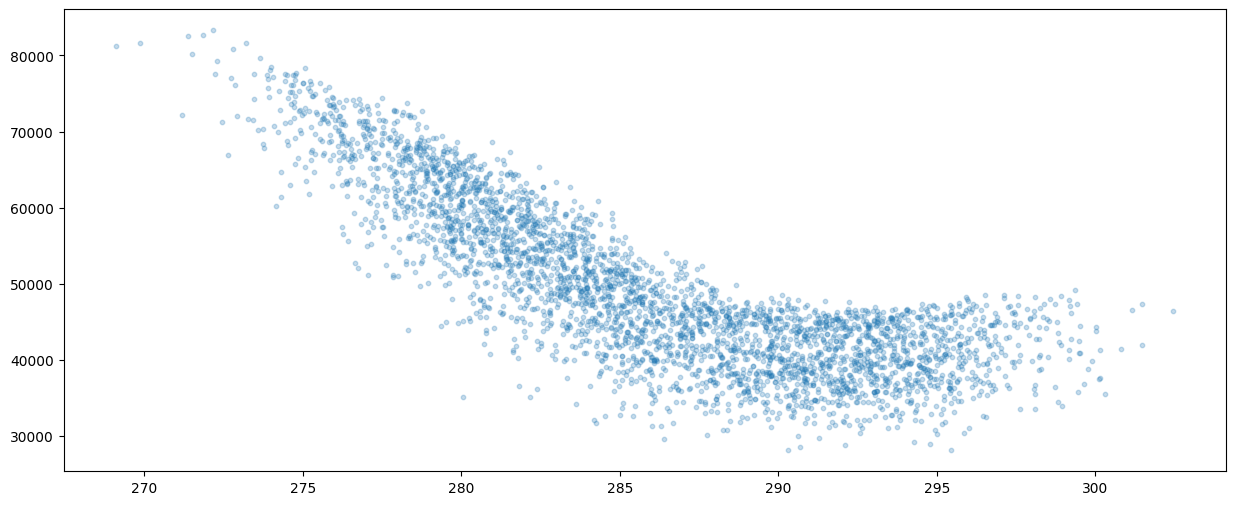

In [87]:
# Temperature effect
fig, ax1 = plt.subplots( figsize=(15, 6))

ax1.plot(Data0["Date"], Data0["Net_demand"], color="black", label="Net Demand", alpha=0.7)
ax2 = ax1.twinx()
ax2.plot(Data0["Date"], Data0["Temp"], color="red", label="Temperature", alpha=0.7)

ax2.set_ylabel("Temperature", color="red")
plt.show()

plt.figure(figsize=(15, 6))
plt.scatter(Data0["Temp"], Data0["Net_demand"], alpha=0.25, s=10)
plt.show()

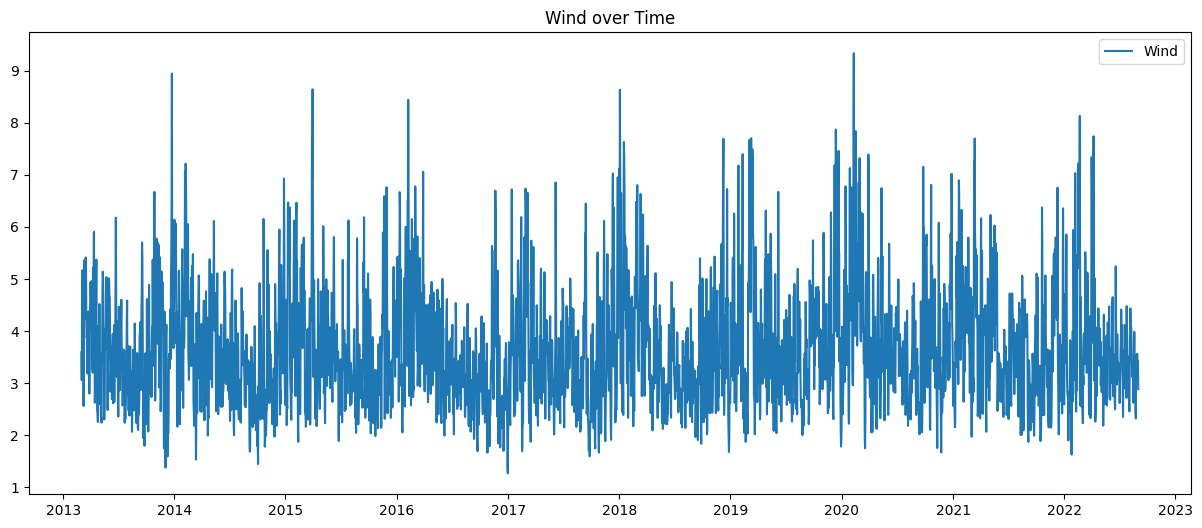

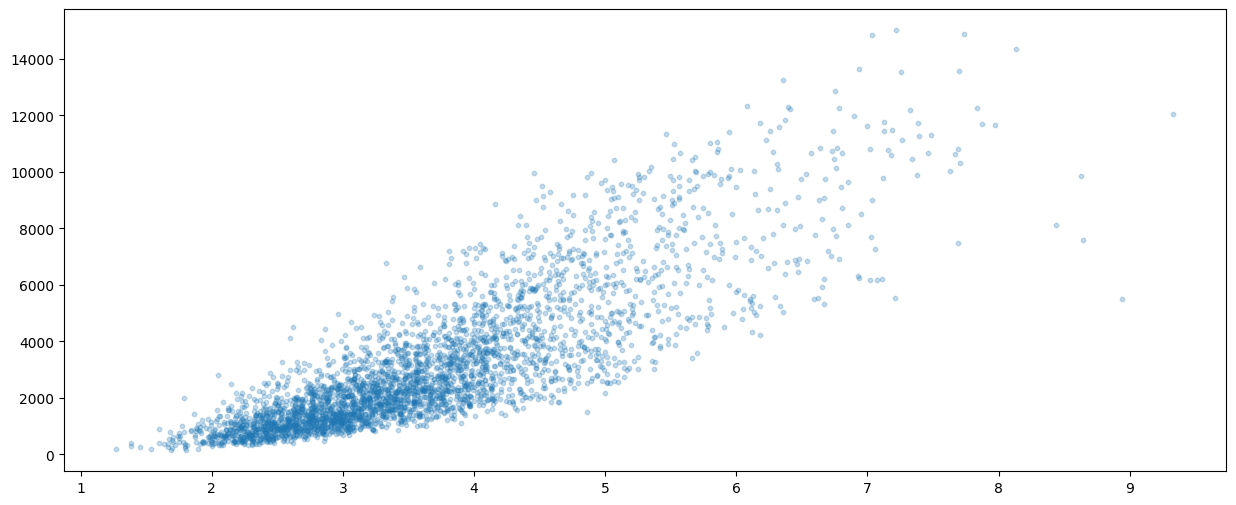

In [86]:
#### Wind effect
plt.figure(figsize=(15, 6))
plt.plot(Data0["Date"], Data0["Wind"], label="Wind")
plt.title("Wind over Time")
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.scatter(Data0["Wind"], Data0["Wind_power"], alpha=0.25, s=10)
plt.show()

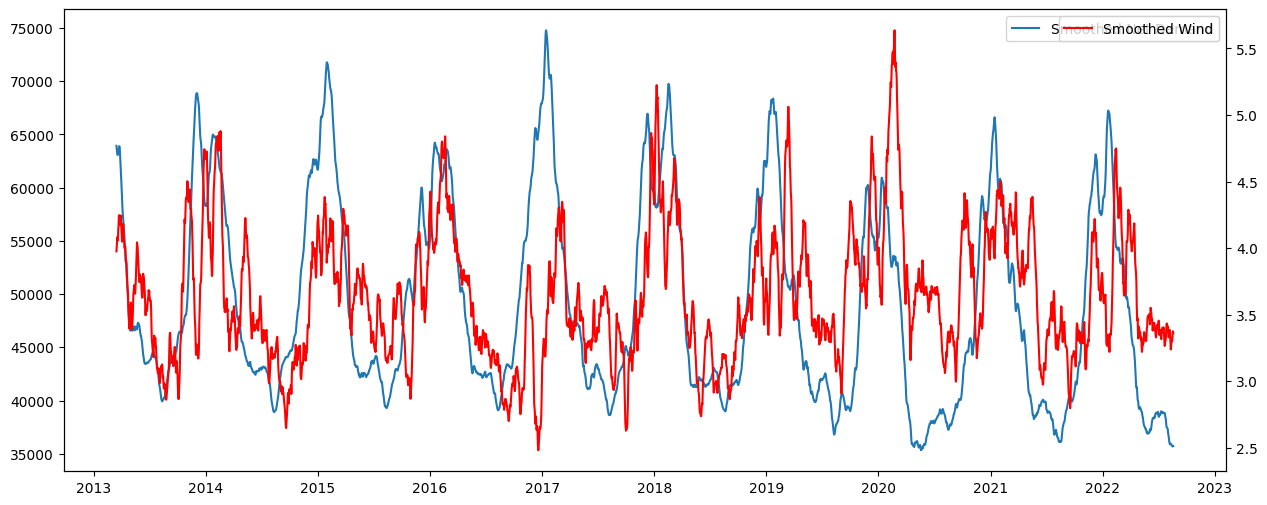

In [93]:
K = 7 * 4
smooth_net = Data0["Net_demand"].rolling(K, center=True).mean()
smooth_wind = Data0["Wind"].rolling(K, center=True).mean()

fig, ax1 = plt.subplots( figsize=(15, 6))
ax1.plot(Data0["Date"], smooth_net, label="Smoothed Net Demand")
ax2 = ax1.twinx()
ax2.plot(Data0["Date"], smooth_wind, color="red", label="Smoothed Wind")
ax1.legend()
ax2.legend()
plt.show()

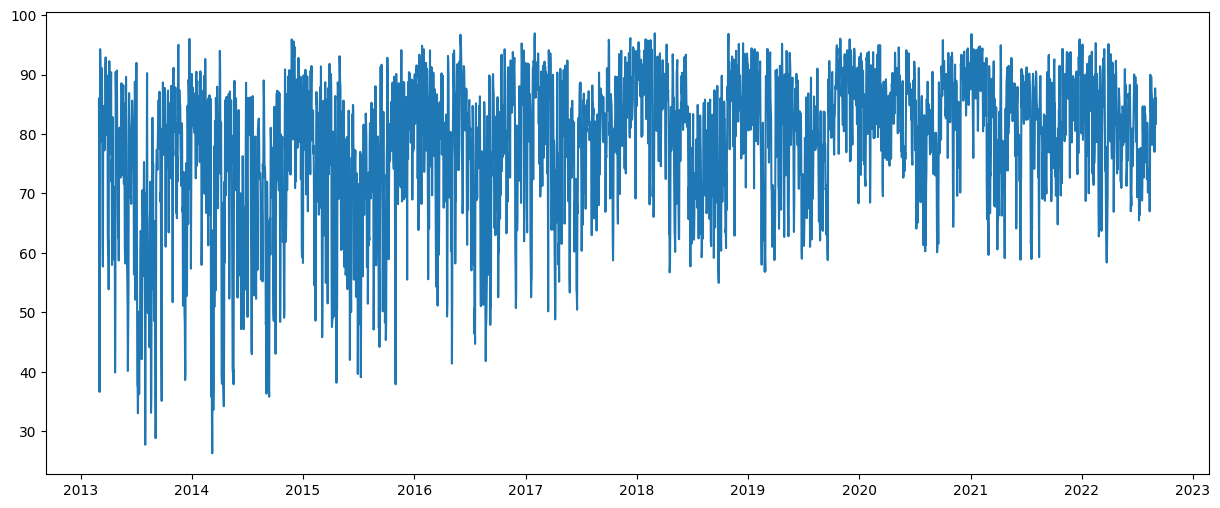

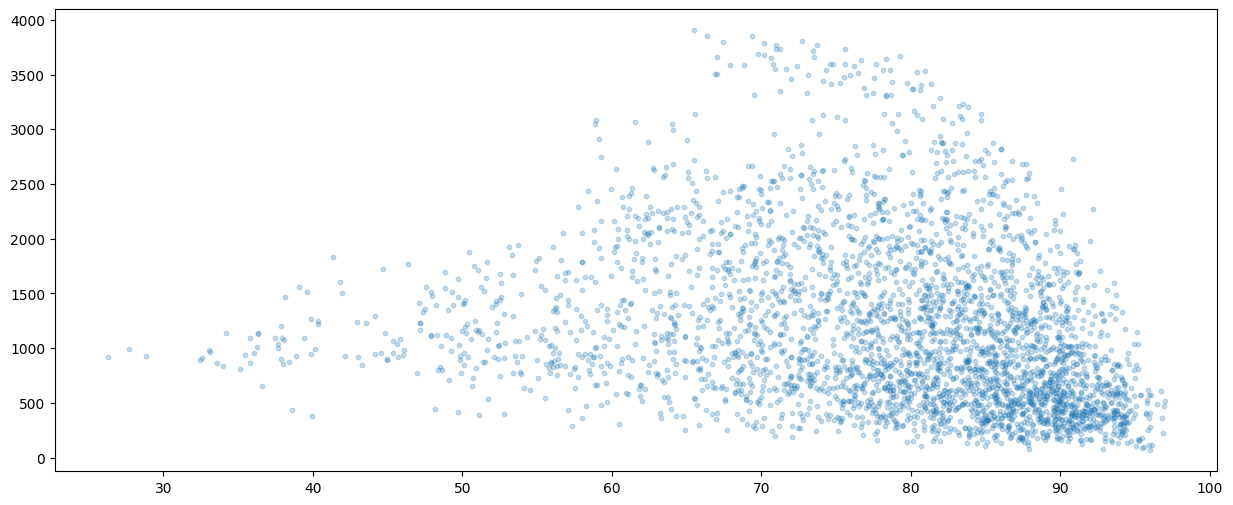

In [95]:
##################### solar / nebulosity effect
plt.figure(figsize=(15, 6))
plt.plot(Data0["Date"], Data0["Nebulosity"], label="Nebulosity")
plt.show()

plt.figure(figsize=(15, 6))
plt.scatter(Data0["Nebulosity"], Data0["Solar_power"], alpha=0.25, s=10)
plt.show()

In [96]:
sel = Data0["Date"].dt.year >= 2018
print(f"The correlation between Nebulosity and Solar Power is: {Data0.loc[sel, 'Nebulosity'].corr(Data0.loc[sel, 'Solar_power'])}")

The correlation between Nebulosity and Solar Power is: -0.5754203900594455


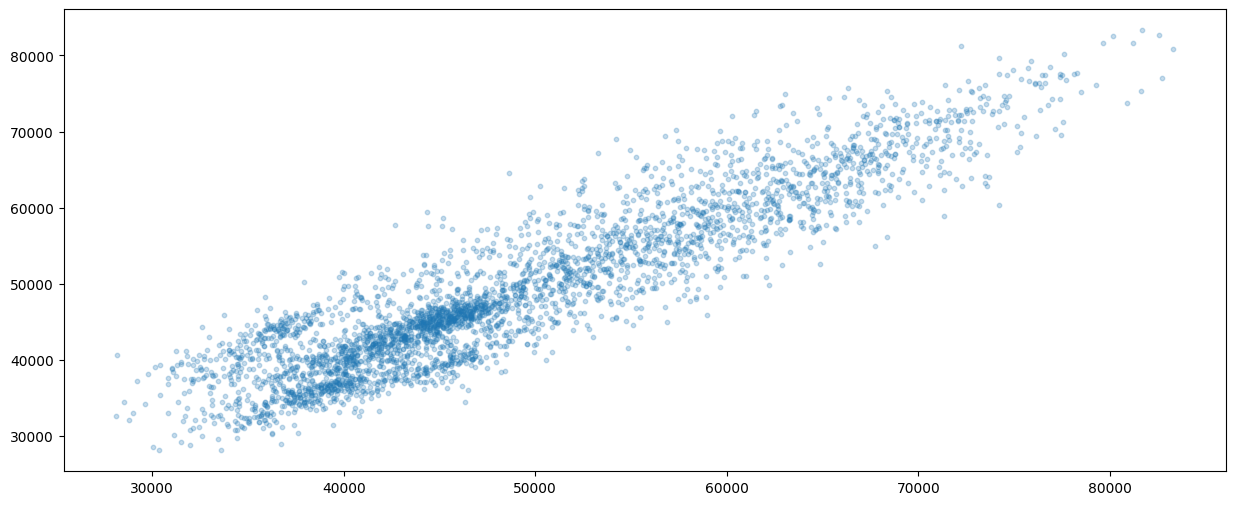

The correlation between lagged Net Demand and current Net Demand is: 0.9205977560324217


In [98]:
#### lagged net demand
plt.figure(figsize=(15, 6))
plt.scatter(Data0["Net_demand.1"], Data0["Net_demand"], s=10, alpha=0.25)
plt.show()

print(f"The correlation between lagged Net Demand and current Net Demand is: {Data0['Net_demand.1'].corr(Data0['Net_demand'])}")

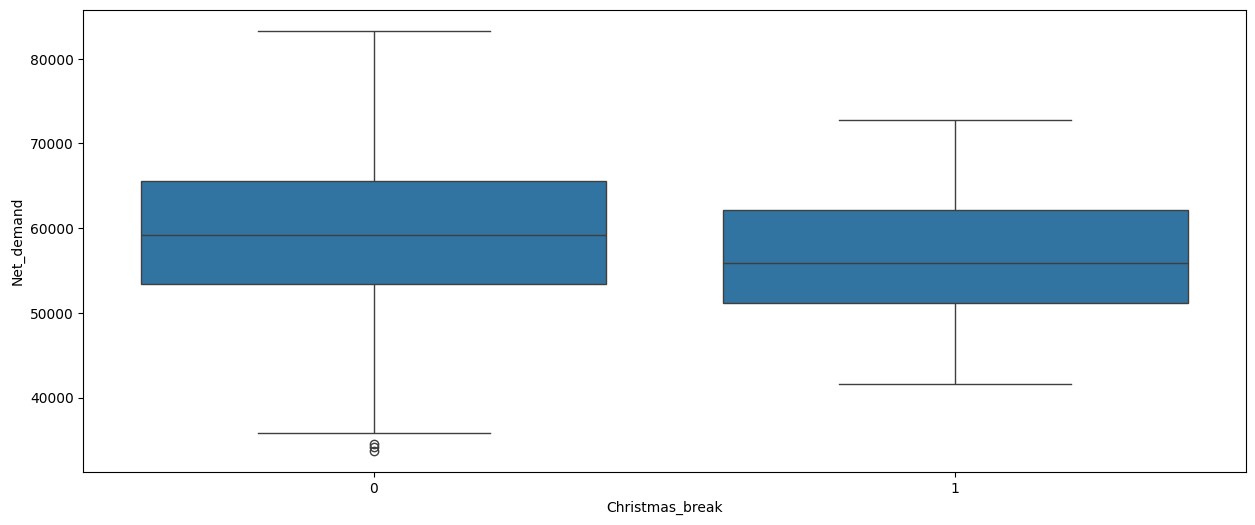

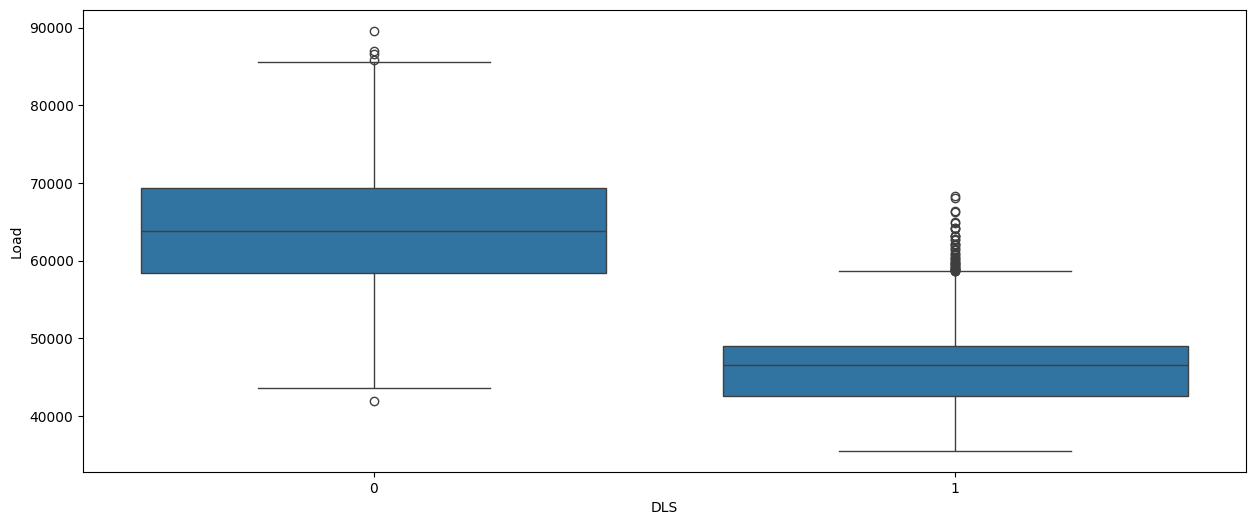

In [99]:
### Holiday effect
plt.figure(figsize=(15, 6))
sns.boxplot(x="Christmas_break", y="Net_demand",
            data=Data0[Data0["DLS"] == 0])
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x="DLS", y="Load", data=Data0)
plt.show()

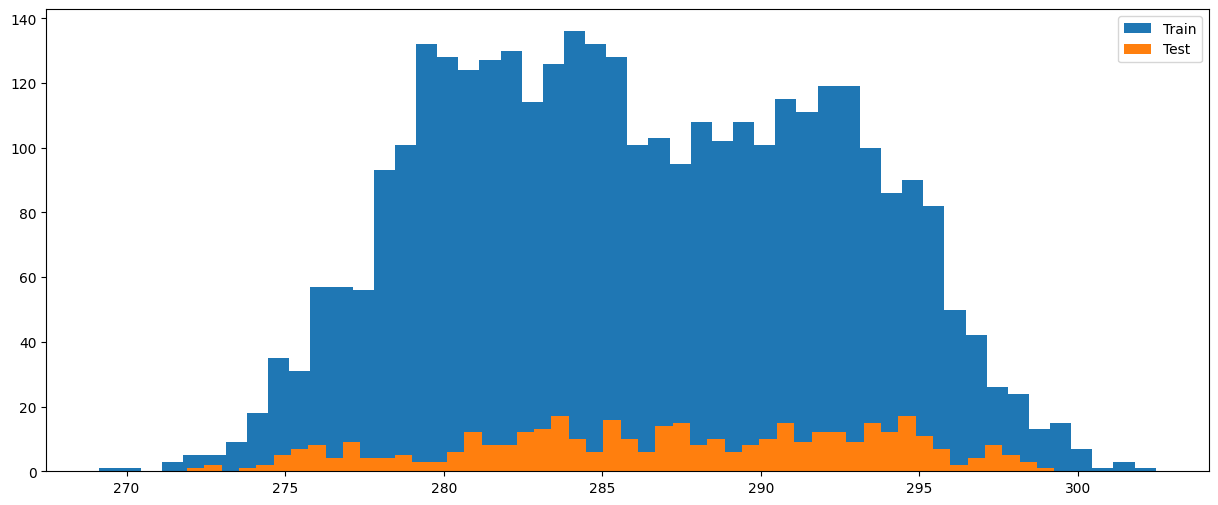

In [104]:
### Train/test comparison
plt.figure(figsize=(15, 6))
plt.hist(Data0["Temp"], bins=50, label="Train")
plt.hist(Data1["Temp"], bins=50, label="Test")
plt.legend()
plt.show()